# Trabajo Practico Final

El objetivo de este trabajo práctico es analizar las particularidades de la utilización de
algoritmos para la generación de modelos de aprendizaje automático.

Fechas de entrega obligatoria:  
- 01/8/2023 a las 23:59 hs.

Importante: las entregas obligatorias, deben efectuarse a través del campus la UnaHur.

La entrega será individual, en formato de Nootebook. La cual debe presentar un formato prolijo con todas las notas explicativas que considere pertinentes. Al mismo tiempo, debe entregar un set de datos, producto de las transformaciones realizadas hasta el punto 4.

El nombre del archivo deberá respetar el siguiente formato: "APELLIDO_NOMBRE_TP_AA_2023.ipynb"

## Generar Data Frame

Previa conexion a Mi Drive:
- A partir del set de datos insurance_aa_2023.csv generar el data frame "data".

EL objetivo de este trabajo práctico será predecir el costo médico de personas en EE.UU. utilizando los distintos modelos vistos en el curso. Podrán encontrar más información sobre el dataset [aqui](https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv).

## Exploración del dataset

1. A partir de los datos entregados, describir los atributos realizando una breve explicación de qué representan y del tipo de variable (categórica, numérica u ordinal). En caso de que haya variables no numéricas, reportar los posibles valores que toman y cuán frecuentemente lo hacen.
  - Ver los primeros seis registros
  - Ver el tamaño del dataset
  - Ver los tipos de datos de cada columna
  - Usar el método *describe()* para ver las variables numéricas

2. Verificar la existencia de valores faltantes. Si los hay, ¿cuántos son y en qué atributos se encuentran? En caso de haberlos, realice la imputación de los mismos.

3. Estandarizar las variables numéricas (con excepción de _charges_ que es la variable a predecir).

4. Usar el metodo _get_dummies()_ para reemplazar las variables categóricas

## Modelos

5. Dividir el dataset en un conjunto de entrenamiento(90%) y uno de testeo (10%).

6. Realizar: (a) un modelo de regresión lineal; (b) modelo de árboles de decisión y (c) random forest. En todos los casos elija un hiperparámetro para ajustar utilizando **cross-validation**. ¿Cuáles fueron las variables más importantes para cada uno de los modelos?

7. Mencione la forma en la que se controló el overfitting en cada uno de los modelos realizados en el punto anterior.

8. Compare los modelos realizados. ¿Cuál considera que obtuvo un mejor resultado?

#Desarrollo TP Final
##Exploración del Dataset

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import pandas as pd
import numpy as np

# Ruta al archivo CSV en Google Drive
ruta_archivo_csv = '/content/drive/MyDrive/2023 UNaHur/Aprendizaje automático/TP Final/insurance_aa_2023.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.DataFrame(pd.read_csv(ruta_archivo_csv))

# Ahora puedes trabajar con el DataFrame 'df'

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Descripcion de variables:**

In [113]:
df.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [114]:
# Para obtener el tamaño del DataFrame:
tamaño_dataset = df.shape
print("Número de filas:", tamaño_dataset[0])
print("Número de columnas:", tamaño_dataset[1])


Número de filas: 1338
Número de columnas: 7


In [115]:
# Para obtener los tipos de datos de cada columna:
info_df = df.info()
print(info_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1320 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [116]:
# Para ver un resumen estadístico de las variables numéricas:
descripcion_variables_numericas = df.describe()
print(descripcion_variables_numericas)


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [118]:
# Verificar la existencia de valores faltantes en el DataFrame
valores_faltantes = df.isnull().sum()

# Filtrar las columnas que tienen valores faltantes
columnas_con_valores_faltantes = valores_faltantes[valores_faltantes > 0]

# Mostrar el número de valores faltantes y en qué atributos se encuentran
print("Número de valores faltantes por columna:")
print(columnas_con_valores_faltantes)


Número de valores faltantes por columna:
region    18
dtype: int64


En este momento es donde el trabajo empieza a presentar variaciones.
Tomo la decisión de encontrar outliers para luego eliminarlos y recien tomar la decisicion de imputar.

In [119]:
# Obtener los valores únicos y su frecuencia en la columna "region"
valores_unicos = df['region'].unique()
frecuencia_valores = df['region'].value_counts()

# Obtener el valor que más se repite en la columna "region"
valor_mas_comun = df['region'].mode().values[0]

# Mostrar los resultados
print("Valores únicos en la columna 'region':")
print(valores_unicos)

print("\nFrecuencia de cada valor único en la columna 'region':")
print(frecuencia_valores)

print("\nValor que más se repite en la columna 'region':", valor_mas_comun)


Valores únicos en la columna 'region':
['southwest' 'southeast' 'northwest' 'northeast' nan]

Frecuencia de cada valor único en la columna 'region':
southeast    361
southwest    321
northeast    321
northwest    317
Name: region, dtype: int64

Valor que más se repite en la columna 'region': southeast


In [120]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Tomo la decisión de imputar los datos faltantes por medio de la constante 0.
Considero es el método menos invasivo con respecto a mis datos, ya que si solamente los eliminaría (hablamos de los datos faltantes) teminaría por desechar columnas que cuentan con datos que pueden servir para mi modelo.
Imputar por medio de la media o el valor más frecuente produciría un movimiento en las estadisticas más notables que el sustituirlos por la constante 0. Hay que recordar que hablamos de pocos datos faltantes.

In [121]:
from sklearn.impute import SimpleImputer

# Crear una copia del DataFrame para mantener los datos originales intactos
df_imputado = df.copy()

# Seleccionar las columnas que contienen valores faltantes, en este caso, solo la columna "region"
columnas_con_faltantes = ['region']

# Crear el objeto SimpleImputer con la estrategia "constant" y fill_value "missing_value"
fill_value = "missing_value"
imputer = SimpleImputer(strategy='constant', fill_value=fill_value)

# Realizar la imputación en la columna "region"
df_imputado[columnas_con_faltantes] = imputer.fit_transform(df_imputado[columnas_con_faltantes])

# Mostrar el DataFrame después de la imputación
print(df_imputado)


      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [122]:
# Verificar la existencia de valores faltantes en el DataFrame
valores_faltantes = df_imputado.isnull().sum()

# Filtrar las columnas que tienen valores faltantes
columnas_con_valores_faltantes = valores_faltantes[valores_faltantes > 0]

# Mostrar el número de valores faltantes y en qué atributos se encuentran
print("Número de valores faltantes por columna:")
print(columnas_con_valores_faltantes)

Número de valores faltantes por columna:
Series([], dtype: int64)


In [123]:
from sklearn.neighbors import LocalOutlierFactor

# Crear una copia del DataFrame para mantener los datos originales intactos
df_outliers = df_imputado.copy()

# Seleccionar solo las columnas numéricas para la detección de outliers
columnas_numericas = ['age', 'bmi', 'children', 'charges']

# Crear el objeto LocalOutlierFactor
lof_detector = LocalOutlierFactor(n_neighbors=5, contamination='auto')  # Puedes ajustar el valor de 'n_neighbors'

# Detectar los valores atípicos utilizando LOF
outliers_mask = lof_detector.fit_predict(df_outliers[columnas_numericas]) == -1
outliers_indices = df_outliers.index[outliers_mask]

# Mostrar los valores atípicos
print("Valores atípicos:")
print(df_outliers.loc[outliers_indices])
print(df_outliers.loc[outliers_indices].shape)

# Eliminar los outliers del DataFrame
df_cleaned = df_outliers.drop(outliers_indices)

# Mostrar el DataFrame después de la eliminación de outliers
print("\nDataFrame después de eliminar outliers:")
print(df_cleaned)


Valores atípicos:
      age     sex     bmi  children smoker     region      charges
30     22    male  35.600         0    yes  southwest  35585.57600
34     28    male  36.400         1    yes  southwest  51194.55914
56     58  female  31.825         2     no  northeast  13607.36875
64     20  female  22.420         0    yes  northwest  14711.74380
68     40  female  36.190         0     no  southeast   5920.10410
...   ...     ...     ...       ...    ...        ...          ...
1254   34  female  27.720         0     no  southeast   4415.15880
1266   55  female  30.500         0     no  southwest  10704.47000
1292   21    male  23.210         0     no  southeast   1515.34490
1313   19  female  34.700         2    yes  southwest  36397.57600
1317   18    male  53.130         0     no  southeast   1163.46270

[104 rows x 7 columns]
(104, 7)

DataFrame después de eliminar outliers:
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0  

In [124]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas para estandarizar (excluyendo 'charges')
columnas_numericas = ['age', 'bmi', 'children']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Estandarizar las columnas numéricas
df_cleaned[columnas_numericas] = scaler.fit_transform(df_cleaned[columnas_numericas])

# El DataFrame 'df_cleaned' ahora tiene las columnas numéricas estandarizadas

df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,-1.442982,female,-0.448577,-0.920890,yes,southwest,16884.92400
1,-1.514574,male,0.518909,-0.080374,no,southeast,1725.55230
2,-0.798653,male,0.391999,1.600660,no,southeast,4449.46200
3,-0.440692,male,-1.304810,-0.920890,no,northwest,21984.47061
4,-0.512284,male,-0.287054,-0.920890,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.776374,male,0.057417,1.600660,no,northwest,10600.54830
1334,-1.514574,female,0.213994,-0.920890,no,northeast,2205.98080
1335,-1.514574,female,1.026551,-0.920890,no,southeast,1629.83350
1336,-1.299798,female,-0.794696,-0.920890,no,southwest,2007.94500


In [125]:
# Seleccionar las columnas categóricas para convertirlas en variables dummies
columnas_categoricas = ['sex', 'smoker', 'region']

# Usar get_dummies para crear las variables dummies y reemplazar las columnas categóricas
df_final = pd.get_dummies(df_cleaned, columns=columnas_categoricas, drop_first=True)

# Mostrar el DataFrame después de la conversión
print(df_final)


           age       bmi  children      charges  sex_male  smoker_yes  \
0    -1.442982 -0.448577 -0.920890  16884.92400         0           1   
1    -1.514574  0.518909 -0.080374   1725.55230         1           0   
2    -0.798653  0.391999  1.600660   4449.46200         1           0   
3    -0.440692 -1.304810 -0.920890  21984.47061         1           0   
4    -0.512284 -0.287054 -0.920890   3866.85520         1           0   
...        ...       ...       ...          ...       ...         ...   
1333  0.776374  0.057417  1.600660  10600.54830         1           0   
1334 -1.514574  0.213994 -0.920890   2205.98080         0           0   
1335 -1.514574  1.026551 -0.920890   1629.83350         0           0   
1336 -1.299798 -0.794696 -0.920890   2007.94500         0           0   
1337  1.563888 -0.255739 -0.920890  29141.36030         0           1   

      region_northeast  region_northwest  region_southeast  region_southwest  
0                    0                 0    

Hasta aquí considero esta el trabajo de preprocesamiento de los datos.

In [126]:
# Exportar el DataFrame con los valores imputados a un archivo CSV
df_final.to_csv('datos_pretratado.csv', index=False)

##Modelos
###División de datos


In [127]:
from sklearn.model_selection import train_test_split

# Crear una variable para la variable a predecir (target)
y = df_final['charges']

# Crear una variable para las características (features) que utilizaremos para el entrenamiento
X = df_final.drop(columns=['charges'])

# Dividir el conjunto de datos en entrenamiento (80%) y testeo (20%)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Dividir el conjunto de entrenamiento en entrenamiento (70%) y validación (10%)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1, random_state=42)

# Mostrar el tamaño de los conjuntos de entrenamiento, validación y testeo
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de testeo:", X_test.shape)


Tamaño del conjunto de entrenamiento: (999, 9)
Tamaño del conjunto de validación: (111, 9)
Tamaño del conjunto de testeo: (124, 9)


###Modelo de Regresión sin regularización

In [128]:
# Imports necesarios (extra)
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
# Creación y entrenamiento del modelo de regresión lineal
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)

# Predicciones en el conjunto de validación
y_val_pred_clasica = reg_linear.predict(X_val)

# Cálculo del error cuadrático medio en el conjunto de validación
mse_clasica = mean_squared_error(y_val, y_val_pred_clasica)

print("Error cuadrático medio (Clásica):", mse_clasica)

Error cuadrático medio (Clásica): 41135289.00860892


In [129]:
reg_linear.intercept_

9078.927561271063

In [130]:
reg_linear.coef_

array([ 3.61409913e+03,  2.12429382e+03,  5.79050067e+02,  4.42854432e+00,
        2.37945971e+04, -9.37911939e+01, -6.13869267e+02, -9.53330126e+02,
       -1.03452537e+03])

In [131]:
coef = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(reg_linear.coef_)})

[Text(0, 0, 'age'),
 Text(1, 0, 'bmi'),
 Text(2, 0, 'children'),
 Text(3, 0, 'sex_male'),
 Text(4, 0, 'smoker_yes'),
 Text(5, 0, 'region_northeast'),
 Text(6, 0, 'region_northwest'),
 Text(7, 0, 'region_southeast'),
 Text(8, 0, 'region_southwest')]

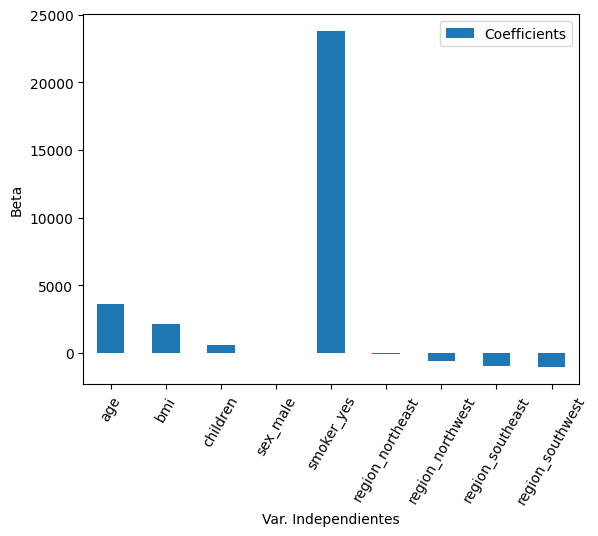

In [132]:
ax = coef.plot.bar()
ax.set_xlabel("Var. Independientes")
ax.set_ylabel("Beta")
ax.set_xticklabels(coef.Feature, rotation=60)

##Modelo de Regresión con regularización

In [133]:
# Creación y entrenamiento del modelo de regresión con Ridge
reg_ridge = Ridge(alpha=0.1) # Seleccionamos un valor de alpha (hiperparámetro) de 0.1
reg_ridge.fit(X_train, y_train)

# Predicciones en el conjunto de validación
y_val_pred_ridge = reg_ridge.predict(X_val)

# Cálculo del error cuadrático medio en el conjunto de validación
mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)

print("Error cuadrático medio (Ridge):", mse_ridge)

Error cuadrático medio (Ridge): 41122526.58152386


In [134]:
# Creación y entrenamiento del modelo de regresión con Lasso
reg_lasso = Lasso(alpha=0.1) # Seleccionamos un valor de alpha (hiperparámetro) de 0.1
reg_lasso.fit(X_train, y_train)

# Predicciones en el conjunto de validación
y_val_pred_lasso = reg_lasso.predict(X_val)

# Cálculo del error cuadrático medio en el conjunto de validación
mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)

print("Error cuadrático medio (Lasso):", mse_lasso)

Error cuadrático medio (Lasso): 41133224.48320229


In [135]:
# Comparemos los resultados obtenidos hasta aca en val
print("Error cuadrático medio (Lasso):", mse_lasso)
print("Error cuadrático medio (Ridge):", mse_ridge)
print("Error cuadrático medio (Clásica):", mse_clasica)

Error cuadrático medio (Lasso): 41133224.48320229
Error cuadrático medio (Ridge): 41122526.58152386
Error cuadrático medio (Clásica): 41135289.00860892


In [162]:
mse_alphas = []
alphas = np.arange(0.01, 0.51, 0.01)
for i in alphas:
  # Creación y entrenamiento del modelo de regresión con Lasso
  reg_lasso = Lasso(alpha=i) # Seleccionamos un valor de alpha (hiperparámetro)
  reg_lasso.fit(X_train, y_train)

  # Predicciones en el conjunto de validación
  y_val_pred_lasso = reg_lasso.predict(X_val)

  # Cálculo del error cuadrático medio en el conjunto de validación
  mse_lasso = mean_squared_error(y_val, y_val_pred_lasso)
  mse_alphas.append(mse_lasso)

  print("Error cuadrático medio (Lasso) con alpha = {} es {}".format(round(i, 2), round(mse_lasso, 2)))

Error cuadrático medio (Lasso) con alpha = 0.01 es 41135081.76
Error cuadrático medio (Lasso) con alpha = 0.02 es 41134874.7
Error cuadrático medio (Lasso) con alpha = 0.03 es 41134667.7
Error cuadrático medio (Lasso) con alpha = 0.04 es 41134461.0
Error cuadrático medio (Lasso) con alpha = 0.05 es 41134254.6
Error cuadrático medio (Lasso) con alpha = 0.06 es 41134048.06
Error cuadrático medio (Lasso) con alpha = 0.07 es 41133841.76
Error cuadrático medio (Lasso) con alpha = 0.08 es 41133635.8
Error cuadrático medio (Lasso) con alpha = 0.09 es 41133429.84
Error cuadrático medio (Lasso) con alpha = 0.1 es 41133224.48
Error cuadrático medio (Lasso) con alpha = 0.11 es 41133018.53
Error cuadrático medio (Lasso) con alpha = 0.12 es 41132813.35
Error cuadrático medio (Lasso) con alpha = 0.13 es 41132608.12
Error cuadrático medio (Lasso) con alpha = 0.14 es 41132403.12
Error cuadrático medio (Lasso) con alpha = 0.15 es 41132198.13
Error cuadrático medio (Lasso) con alpha = 0.16 es 41131993.3

In [163]:
#Creo un diccionario teniendo como keys los alphas que probamos y como values el MSE obtenido
results = dict(zip(alphas, mse_alphas))

In [164]:
#Ahora buscamos cuál es el alpha que mejor nos dio...
min(results, key=results.get)

0.5

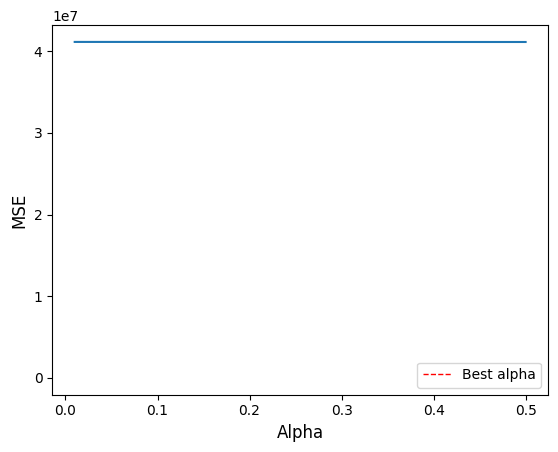

In [165]:
#Grafiquemos cómo cambio el MSE a medida en que fuimos cambiando el alpha
import matplotlib.pyplot as plt

x = alphas
y = mse_alphas

plt.plot(x, y)
plt.vlines(x=0.1, ymin=2350, ymax=2550, colors='red', ls='--', lw=1, label='Best alpha')
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.legend(loc='lower right')
plt.show()

In [166]:
#Ajustamos el modelo con el mejor alpha que encontramos y medimos el error en test
reg_lasso = Lasso(alpha=0.5)
reg_lasso.fit(X_train, y_train)

# Predicciones en el conjunto de testeo para Lasso
y_test_pred_lasso = reg_lasso.predict(X_test)

# Cálculo del error cuadrático medio en el conjunto de testeo
mse_lassoCV = mean_squared_error(y_test, y_test_pred_lasso)

print("Error cuadrático medio (Lasso):", mse_lasso)

Error cuadrático medio (Lasso): 41126369.79656993


## $\alpha$ con Cross Validation

In [167]:
# Vamos dividir nuestro conjunto de entrenamiento en 5 folds.

#Definimos los alpha que queremos probar
alphas = np.arange(0.01, 0.51, 0.01)

#Modelo Ridge
reg_ridgeCV =RidgeCV(alphas=alphas, cv=5)
reg_ridgeCV.fit(X_train, y_train)

#Modelo Lasso
reg_lassoCV = LassoCV(alphas=alphas, cv=5)
reg_lassoCV.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ]),
        cv=5)

In [168]:
# Predicciones en el conjunto de testeo para Ridge
y_test_pred_ridgeCV = reg_ridgeCV.predict(X_test)

# Cálculo del error cuadrático medio en el conjunto de testeo
mse_ridgeCV = mean_squared_error(y_test, y_test_pred_ridgeCV)

print("Mejor alpha encontrado:", reg_ridgeCV.alpha_)
print("Error cuadrático medio (RidgeCV):", mse_ridgeCV)

Mejor alpha encontrado: 0.5
Error cuadrático medio (RidgeCV): 47468865.0207141


In [169]:
# Predicciones en el conjunto de testeo para Lasso
y_test_pred_lassoCV = reg_lassoCV.predict(X_test)

# Cálculo del error cuadrático medio en el conjunto de testeo
mse_lassoCV = mean_squared_error(y_test, y_test_pred_lassoCV)

print("Mejor alpha encontrado:", reg_lassoCV.alpha_)
print("Error cuadrático medio (LassoCV) Test:", mse_lassoCV)

Mejor alpha encontrado: 0.5
Error cuadrático medio (LassoCV) Test: 47512711.49015847


In [170]:
# Predicciones en el conjunto de testeo para Lasso
y_train_pred_lassoCV = reg_lassoCV.predict(X_train)

# Cálculo del error cuadrático medio en el conjunto de testeo
mse_lassoCV_train = mean_squared_error(y_train, y_train_pred_lassoCV)

print("Error cuadrático medio (LassoCV) Train:", mse_lassoCV_train)

Error cuadrático medio (LassoCV) Train: 35350492.74765493


El mejor "alpha" encontrado para un modelo de regresión es de 0.5.

En el modelo de Regresión la variabale de importancia es ser o no fumador: "Smoker". Es decir, el gasto en salud se eleva si uno es fumador.

##Arboles de decisión

In [171]:
#Librerías necesarias

!pip install geopandas
import geopandas as gpd

In [172]:
# Modulos específicos para árboles de decisión
from sklearn.tree import DecisionTreeRegressor # Arboles de decisión para regresión
from sklearn.tree import plot_tree # Función para visualizar el árbol

from sklearn.ensemble import RandomForestRegressor # Random forests para decisión

# Módulos utiles para evaluar el modelo
from sklearn.model_selection import train_test_split # Para separar en train y test
from sklearn.model_selection import cross_val_score # Para hacer cross-validation y evaluar el modelo

In [177]:
# Lista de features que vamos a considerar
features = ['age','bmi','charges']

# Variable a predecir
target = 'charges'

# Construcción de la matriz de features
X = df_final[features].to_numpy()

# Construcción del vector a predecir
y = df_final[target].to_numpy()

print('Dimensión de la matriz de features: {}'.format(X.shape))
print('Dimensión del vector a predecir: {}'.format(y.shape))
print('Vector a predecir: {}'.format(y))

Dimensión de la matriz de features: (1234, 3)
Dimensión del vector a predecir: (1234,)
Vector a predecir: [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [178]:
# Solo por esta vez para a fijar la semilla de numeros aleatorios
# para que se separe siempre igual cada vez que corramos esta notebook
random_seed = 123475

# Creacion de las matrices de entrenamiento y testeo. Aca fijamos la semilla para que siempre separe igual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = random_seed)

print('Dimensión de la matriz de features para entrenamiento: {}'.format(X_train.shape))
print('Dimensión de la matriz de features para testeo: {}'.format(X_test.shape))

Dimensión de la matriz de features para entrenamiento: (1110, 3)
Dimensión de la matriz de features para testeo: (124, 3)


In [179]:
# Construcción del árbol de decisión de profundidad 3
dtr = DecisionTreeRegressor(max_depth = 3, random_state = random_seed)

# Observación: todos los algoritmos tienen una componente aleatoria:
# solo por esta vez permitanme fijar la semilla de numeros aleatorios para que los resultados sean reproducibles.

In [180]:
# Entrenamiento del modelo con el método fit
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123475)

In [181]:
# Score del modelo en los datos de entrenamiento (siempre esperamos que aquí sea alto)
score_in_train = dtr.score(X_train, y_train)

print('Score en el set de entrenamiento: {}'.format(score_in_train))

Score en el set de entrenamiento: 0.9786497201902774


In [182]:
# Score del modelo en los datos de testeo
# (acá puede fluctuar pero en general es bajo respecto a los datos de entrenamiento)
score_in_test = dtr.score(X_test, y_test)

print('Score en el set de testeo: {}'.format(score_in_test))

Score en el set de testeo: 0.9848502431936348


##Visualizacion

[Text(0.5, 0.875, 'charges <= 21929.749\nsquared_error = 144664765.497\nsamples = 1110\nvalue = 13393.006'),
 Text(0.25, 0.625, 'charges <= 9575.442\nsquared_error = 27601012.771\nsamples = 907\nvalue = 8483.428'),
 Text(0.125, 0.375, 'charges <= 5298.913\nsquared_error = 5852800.569\nsamples = 563\nvalue = 5048.465'),
 Text(0.0625, 0.125, 'squared_error = 1430668.423\nsamples = 314\nvalue = 3183.398'),
 Text(0.1875, 0.125, 'squared_error = 1511206.967\nsamples = 249\nvalue = 7400.397'),
 Text(0.375, 0.375, 'charges <= 15438.643\nsquared_error = 12280070.296\nsamples = 344\nvalue = 14105.185'),
 Text(0.3125, 0.125, 'squared_error = 2256396.191\nsamples = 239\nvalue = 12037.693'),
 Text(0.4375, 0.125, 'squared_error = 3219759.673\nsamples = 105\nvalue = 18811.189'),
 Text(0.75, 0.625, 'charges <= 34033.463\nsquared_error = 78823717.148\nsamples = 203\nvalue = 35328.904'),
 Text(0.625, 0.375, 'charges <= 26659.387\nsquared_error = 10796380.304\nsamples = 85\nvalue = 26486.296'),
 Text(0.

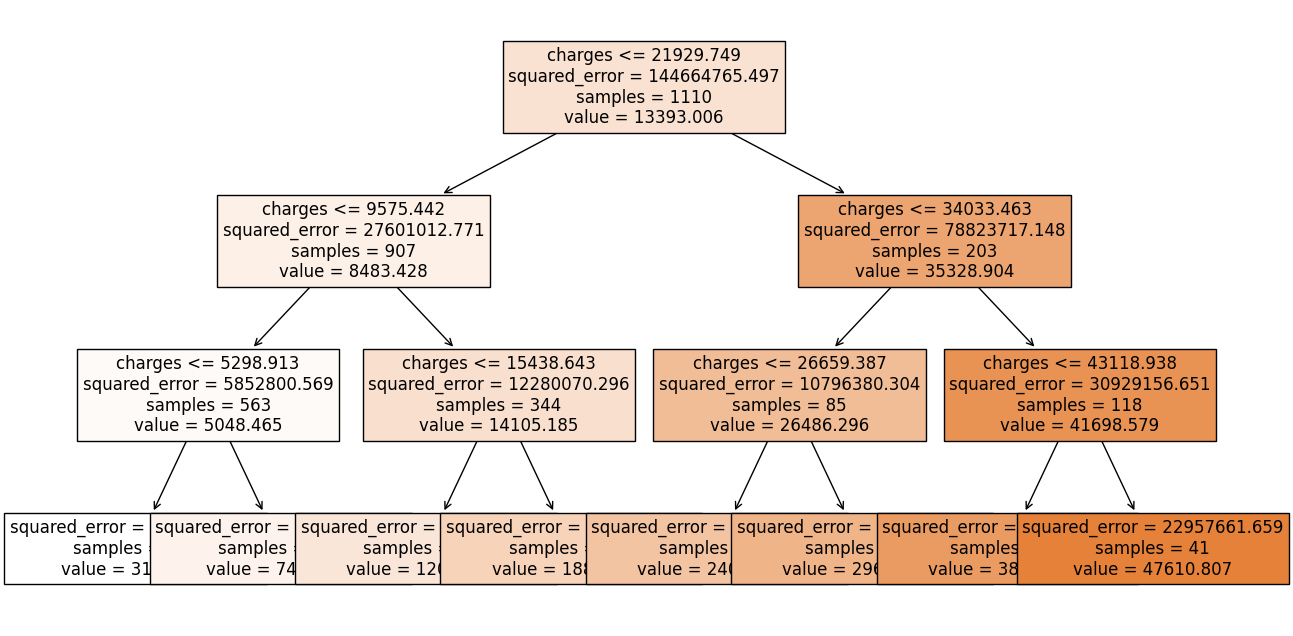

In [183]:
# Creamos la figura donde plotear el árbol con matplotlib
fig, ax = plt.subplots(figsize = (15, 8))

# Llamamos a la función "plot_tree" que importamos de sklearn.tree más arriba.
# Le pasamos como argumento el modelo que creamos y el nombre de los features.
# "fontsize" y "filled" son solo ajustes de la visualización
# y le decimos que plotee el arbol en la figura que creamos
plot_tree(dtr, feature_names=features, fontsize = 12, filled = True, ax = ax)

###¿Overfiting?

In [184]:
# Construcción del árbol de decisión con la máxima profundidad
dtr = DecisionTreeRegressor(max_depth = None)

# Entrenamiento del modelo
dtr.fit(X_train, y_train)

# Score del modelo en el conjunto de entrenamiento
score_in_train = dtr.score(X_train, y_train)

# Score del modelo en el conjunto de testeo
score_in_test = dtr.score(X_test, y_test)

print('Score en el set de entrenamiento: {}'.format(score_in_train))
print('Score en el set de testeo: {}'.format(score_in_test))

Score en el set de entrenamiento: 1.0
Score en el set de testeo: 0.9999753609825827


###Delimitación de hojas

[Text(0.5909090909090909, 0.875, 'charges <= 21929.749\nsquared_error = 144664765.497\nsamples = 1110\nvalue = 13393.006'),
 Text(0.36363636363636365, 0.625, 'charges <= 9575.442\nsquared_error = 27601012.771\nsamples = 907\nvalue = 8483.428'),
 Text(0.18181818181818182, 0.375, 'charges <= 5298.913\nsquared_error = 5852800.569\nsamples = 563\nvalue = 5048.465'),
 Text(0.09090909090909091, 0.125, 'squared_error = 1430668.423\nsamples = 314\nvalue = 3183.398'),
 Text(0.2727272727272727, 0.125, 'squared_error = 1511206.967\nsamples = 249\nvalue = 7400.397'),
 Text(0.5454545454545454, 0.375, 'charges <= 15438.643\nsquared_error = 12280070.296\nsamples = 344\nvalue = 14105.185'),
 Text(0.45454545454545453, 0.125, 'squared_error = 2256396.191\nsamples = 239\nvalue = 12037.693'),
 Text(0.6363636363636364, 0.125, 'squared_error = 3219759.673\nsamples = 105\nvalue = 18811.189'),
 Text(0.8181818181818182, 0.625, 'charges <= 34033.463\nsquared_error = 78823717.148\nsamples = 203\nvalue = 35328.90

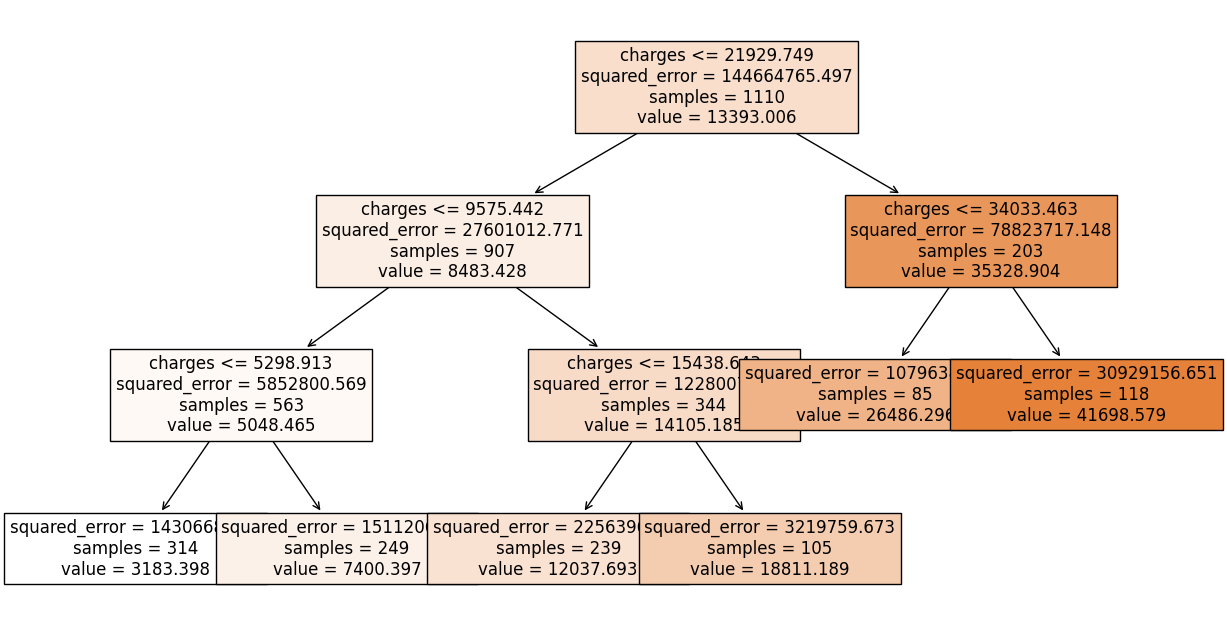

In [185]:
# Creación del árbol con 6 hojas
dtr = DecisionTreeRegressor(max_leaf_nodes = 6)

# Entrenamiento
dtr.fit(X_train, y_train)

# Creamos la figura donde plotear el árbol con matplotlib
fig, ax = plt.subplots(figsize = (15, 8))

# Llamamos a la función "plot_tree" que importamos de sklearn.tree más arriba.
# Le pasamos como argumento el modelo que creamos y el nombre de los features.
# "fontsize" y "filled" son solo ajustes de la visualización
# y le decimos que plotee el arbol en la figura que creamos
plot_tree(dtr, feature_names=features, fontsize = 12, filled = True, ax = ax)

###Instancias

[Text(0.6666666666666666, 0.875, 'charges <= 19172.26\nsquared_error = 144664765.497\nsamples = 1110\nvalue = 13393.006'),
 Text(0.5, 0.625, 'charges <= 8486.789\nsquared_error = 20781586.148\nsamples = 860\nvalue = 7827.996'),
 Text(0.3333333333333333, 0.375, 'charges <= 4502.501\nsquared_error = 4376167.65\nsamples = 501\nvalue = 4557.715'),
 Text(0.16666666666666666, 0.125, 'squared_error = 882444.402\nsamples = 251\nvalue = 2759.956'),
 Text(0.5, 0.125, 'squared_error = 1381152.107\nsamples = 250\nvalue = 6362.666'),
 Text(0.6666666666666666, 0.375, 'squared_error = 7922660.364\nsamples = 359\nvalue = 12391.813'),
 Text(0.8333333333333334, 0.625, 'squared_error = 97809587.666\nsamples = 250\nvalue = 32536.642')]

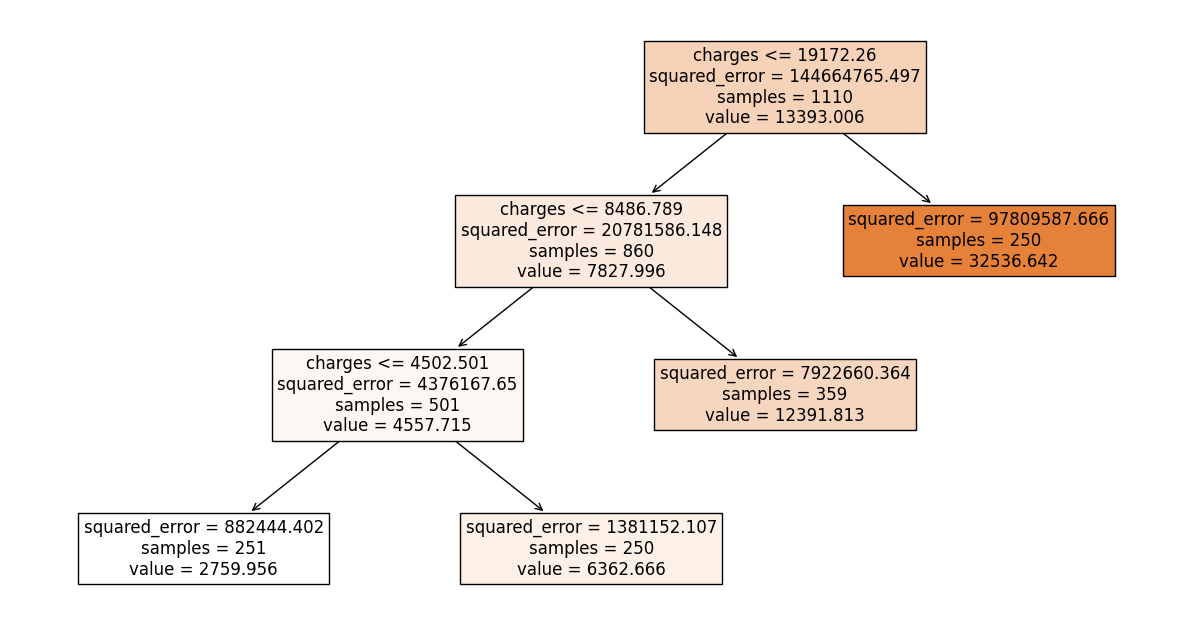

In [186]:
# Creación del árbol con al menos 250 instancias dentro de cada hoja
dtr = DecisionTreeRegressor(min_samples_leaf = 250)

# Entrenamiento
dtr.fit(X_train, y_train)

# Creamos la figura donde plotear el árbol con matplotlib
fig, ax = plt.subplots(figsize = (15, 8))

# Llamamos a la función "plot_tree" que importamos de sklearn.tree más arriba.
# Le pasamos como argumento el modelo que creamos y el nombre de los features.
# "fontsize" y "filled" son solo ajustes de la visualización
# y le decimos que plotee el arbol en la figura que creamos
plot_tree(dtr, feature_names=features, fontsize = 12, filled = True, ax = ax)

###Pruning

[Text(0.660452678391707, 0.9642857142857143, 'charges <= 21929.749\nsquared_error = 144664765.497\nsamples = 1110\nvalue = 13393.006'),
 Text(0.4341897519122383, 0.8928571428571429, 'charges <= 9575.442\nsquared_error = 27601012.771\nsamples = 907\nvalue = 8483.428'),
 Text(0.23524620068438004, 0.8214285714285714, 'charges <= 5298.913\nsquared_error = 5852800.569\nsamples = 563\nvalue = 5048.465'),
 Text(0.12117552334943639, 0.75, 'charges <= 3264.523\nsquared_error = 1430668.423\nsamples = 314\nvalue = 3183.398'),
 Text(0.06083937198067633, 0.6785714285714286, 'charges <= 2261.932\nsquared_error = 299599.626\nsamples = 169\nvalue = 2204.94'),
 Text(0.028230676328502416, 0.6071428571428571, 'charges <= 1787.607\nsquared_error = 90636.901\nsamples = 98\nvalue = 1812.097'),
 Text(0.01076892109500805, 0.5357142857142857, 'charges <= 1439.508\nsquared_error = 45151.03\nsamples = 48\nvalue = 1562.925'),
 Text(0.005233494363929146, 0.4642857142857143, 'charges <= 1194.528\nsquared_error = 32

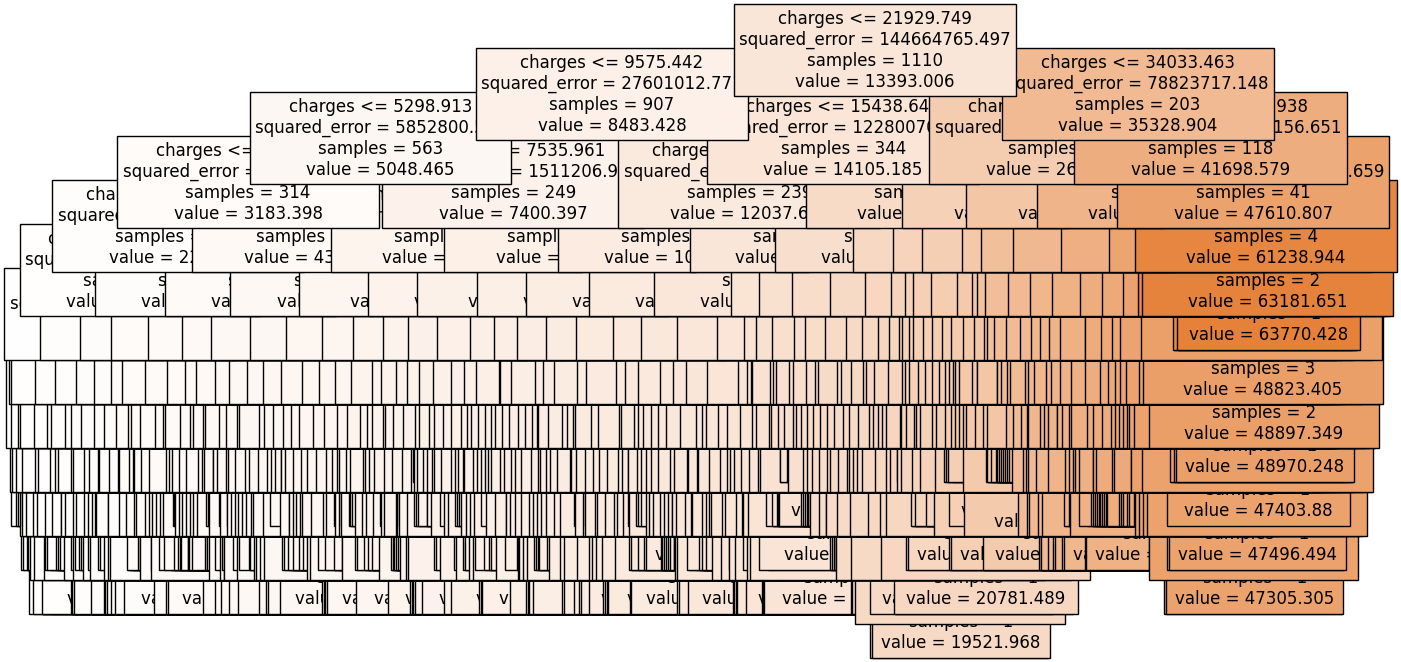

In [189]:
# Creación del árbol con un término de regulación con constante 0.01
dtr = DecisionTreeRegressor(ccp_alpha = 0.01)

# Entrenamiento
dtr.fit(X_train, y_train)

# Creamos la figura donde plotear el árbol con matplotlib
fig, ax = plt.subplots(figsize = (15, 8))

# Llamamos a la función "plot_tree" que importamos de sklearn.tree más arriba.
# Le pasamos como argumento el modelo que creamos y el nombre de los features.
# "fontsize" y "filled" son solo ajustes de la visualización
# y le decimos que plotee el arbol en la figura que creamos
plot_tree(dtr, feature_names=features, fontsize = 12, filled = True, ax = ax)

In [190]:
np.logspace(-10, 0, 11)

array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00])

In [191]:
# Tomamos un valor de alpha entre 10^-10 y 1. Usamos un barrido logaritmico.
for alpha in np.logspace(-10, 0, 11):

    # Creamos el modelo para un dado valor de alpha
    dtr = DecisionTreeRegressor(ccp_alpha = alpha)

    # Calculamos los scores al hacer cross-validation con 5 folds
    scores = cross_val_score(dtr, X_train, y_train, cv = 5)

    # Imprimimos el valor de alpha y el score medio
    print('Valor de alpha {} - Score medio = {}'.format(alpha, scores.mean()))

Valor de alpha 1e-10 - Score medio = 0.9998243981984871
Valor de alpha 1e-09 - Score medio = 0.9998198071346692
Valor de alpha 1e-08 - Score medio = 0.9996837159296001
Valor de alpha 1e-07 - Score medio = 0.9998550432089794
Valor de alpha 1e-06 - Score medio = 0.9997826409428366
Valor de alpha 1e-05 - Score medio = 0.9998296886325244
Valor de alpha 0.0001 - Score medio = 0.9997444998101319
Valor de alpha 0.001 - Score medio = 0.9998129971946119
Valor de alpha 0.01 - Score medio = 0.9998226737693763
Valor de alpha 0.1 - Score medio = 0.9996751336995275
Valor de alpha 1.0 - Score medio = 0.9997559479728366


In [198]:
# Creación del modelo con regularización óptima
dtr = DecisionTreeRegressor(ccp_alpha = 10**-5)

# Entrenamiento
dtr.fit(X_train, y_train)

# Profundidad del árbol al entrenarlo regularizado
depth = dtr.get_depth() # Con este método vemos la profundidad
print('Profundidad del arbol = {}'.format(depth))

# Score en el set de testeo
score_in_train = dtr.score(X_train, y_train)
print('Score en el set de train: {}'.format(score_in_train))

# Score en el set de testeo
score_in_test = dtr.score(X_test, y_test)
print('Score en el set de testeo: {}'.format(score_in_test))

Profundidad del arbol = 15
Score en el set de train: 0.999999999999767
Score en el set de testeo: 0.9999900249292106


##Random Forest

In [199]:
# Constuimos el modelo de Random Forest con 100 estimadores
# Por default, cada árbol individual es entrenado hasta máxima profundidad
rfr = RandomForestRegressor(n_estimators=100)

In [200]:
# Entrenamiento del modelo
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [201]:
# Score en el set de testeo
score_in_test = rfr.score(X_test, y_test)
print('Score en el set de testeo: {}'.format(score_in_test))

Score en el set de testeo: 0.9999567979722422


In [202]:
# Este atributo tiene una medida de la importancia de cada feature
feature_importance = rfr.feature_importances_

print('Features: {}'.format(features))
print('Importancia = {}'.format(feature_importance))

Features: ['age', 'bmi', 'charges']
Importancia = [1.32476045e-04 6.45285064e-05 9.99802995e-01]


In [203]:
# Características
print('Features = {}'.format(features))
print('{}'.format(X_test[0]))

# Valor predicho
p = rfr.predict(X_test[0].reshape(1, -1))

#Precios
print('Valor predicho = {}'.format(10**p))
print('Valor esperado = {}'.format(10**y_test[0]))

Features = ['age', 'bmi', 'charges']
[-9.41836854e-01  1.94129423e+00  3.41032400e+03]
Valor predicho = [inf]
Valor esperado = inf


<ipython-input-203-70580bbb5470>:9: RuntimeWarning: overflow encountered in power
  print('Valor predicho = {}'.format(10**p))
<ipython-input-203-70580bbb5470>:10: RuntimeWarning: overflow encountered in double_scalars
  print('Valor esperado = {}'.format(10**y_test[0]))


##POR MOTIVOS LABORALES NO PUDE DARLE EL TIEMPO NECESARIO AL TP, PERO ESPERO CONTINUAR CON EL CURSO.

###En el siguiente enlace continuo con el trabajo fuera de término:

[https://colab.research.google.com/drive/1Z6y4UN_zuppQ98EvZcP4xZdWO0nQRy7y?usp=sharing](https://)